# overfitting

> 설명력이 높다는 가정 하에 최대한 작은 weight로 설명하면 좋음

![trade_off](../../img/bias_variance_tradeoff.png)

## 극복법
- 더 많은 데이터 활용
- feature 개수 줄이기
- 적절한 paramter 선정
- regularization

# regularization  
( 데이터들의 Weight들을 최대한 0에 가깝게 만들기 )

![regularization](../../img/regularization.png)

> feature에 굉장히 큰 penalty를 주어 minimum cost가 되려면 결국 weight가 작아지게됨

## L2 regularization (ridge)

![l2](../../img/l2_regularizaiton.png)

- $\lambda$ : penalty항 (hypter parameter)
- $\theta$ : $\lambda$ 가 커지면 얜 작아짐

## L1 regularization (lasso regression)

![l1](../../img/l1_regularization.png)

 ### L1 vs L2

- L1
  - unstable solution
  - One or more solution
  - Sparse Solution (어떤 weight 값은 0을 가질 수도 있음) 따라서 처음에 L1을 통해 feature selection을 하기도 함
  - feature selection
- L2
  - stable solution
  - only one solution
  - Non-sparse solution

# regularization with sklearn

## Linear Regression with Normal equation

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X = df.values
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [8]:
y = boston.target
y[:3]

array([24. , 21.6, 34.7])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 42)

In [10]:
from sklearn.linear_model import LinearRegression

lr_ne = LinearRegression(fit_intercept = True)

In [11]:
lr_ne.fit(X_train, y_train)

LinearRegression()

In [12]:
lr_ne.intercept_, lr_ne.coef_

(33.33497575563571,
 array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
        -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
         2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
        -5.47566338e-01]))

In [13]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

Text(0.5, 1.0, 'Prices vs Predicted prices : $Y_i$ vs $\\hat{Y}_i$')

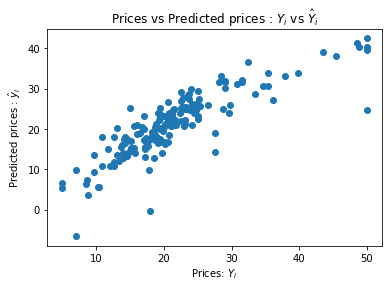

In [15]:
plt.scatter(y_true, y_hat)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices : $\hat{y}_i$')
plt.title('Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$')

## Linear Regression with SGD (linear regression에서는 잘 안 씀)
> 역행렬이 존재하지 않을 수도 있기 때문

- Squared Loss : 오차
- Penalty : L2가 좋음
- alpha : Regularization term()
- L1 ratio : L1, L2 어느 정도 섞어서 사용할지
- fit_intercept : 절편, 상수항
- max_iter : epoch 몇 번 돌릴지
- tol : 현재 loss - 이전의 loss, 차이가 어느 정도 나면 멈출지
- shuffle : Data 섞을 지 말지
- ex) SGD에서 shuffle = False  GD, full-batch가 된다
- learning_rate : 학습 빈도수

In [31]:
from sklearn.linear_model import SGDRegressor

lr_SGD = SGDRegressor()

X Scaling  
: Scale을 해주지 않으면 Data가 발산 할 수 있기 때문에
> 반드시 Scale 해줄것

In [33]:
lr_SGD.fit(X_train, y_train)
y_hat = lr_SGD.predict(X_test)

y_true = y_test

In [34]:
import sklearn

In [35]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt(np.sum((y_hat - y_true)**2) / len(y_true))
rmse, mse, np.sqrt(mse)

(335426962277868.3, 1.125112470229585e+29, 335426962277868.3)

Text(0.5, 1.0, 'Prices vs Predicted Prices : $Y_i$ vs $\\hat{Y}_i$')

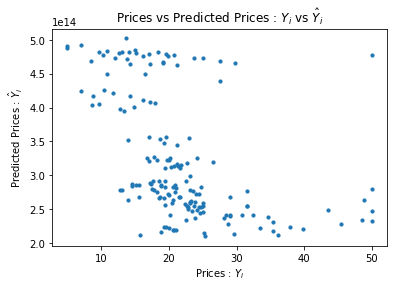

In [36]:
plt.scatter(y_true, y_hat, s= 10)
plt.xlabel('Prices : $Y_i$')
plt.ylabel('Predicted Prices : $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices : $Y_i$ vs $\hat{Y}_i$')

> salce 데이터를 안 쓰면 발산하는 것을 알 수 있음

In [37]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)
X_scaled[:3]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ]])

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [39]:
lr_SGD.fit(X_train, y_train)

SGDRegressor()

In [40]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [41]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt(np.sum((y_hat - y_true)**2) / len(y_true))
rmse, mse, np.sqrt(mse)

(4.627040710434889, 21.409505736021803, 4.627040710434889)

Text(0.5, 1.0, 'Prices vs Predicted Prices : $Y_i$ vs $\\hat{Y}_i$')

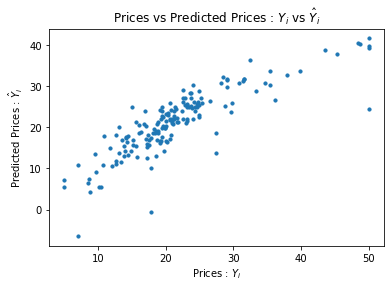

In [42]:
plt.scatter(y_true, y_hat, s= 10)
plt.xlabel('Prices : $Y_i$')
plt.ylabel('Predicted Prices : $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices : $Y_i$ vs $\hat{Y}_i$')

## LinearRegression vs SGDRegressor
- LinearRegression
  - feature수가 작을 때 효과적
- SGDRegressor
  - feature수가 많을 때 효과적

## Linear Regression with Ridge & Lasso Regression

- Normal Equation, SGD 둘 다 사용 가능

In [43]:
from sklearn.linear_model import Lasso, Ridge

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
ridge = Ridge(fit_intercept=True, alpha = 0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [46]:
y_hat_ridge =ridge.predict(X_test)
y_true_ridge = y_test 

In [47]:
mse = sklearn.metrics.mean_squared_error(y_hat_ridge, y_true_ridge)
rmse = np.sqrt(np.sum( (y_hat_ridge - y_true_ridge) **2) / len(y_true_ridge))
rmse, mse

(4.579058484791169, 20.967776607137992)

Text(0.5, 1.0, 'Prices vs Predicted Prices : $Y_i$ vs $\\hat{Y}_i$')

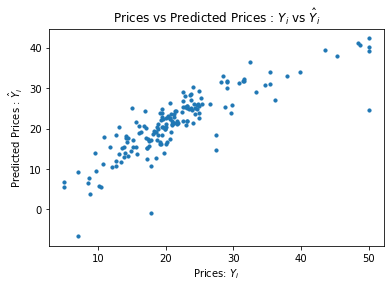

In [48]:
plt.scatter(y_true_ridge, y_hat_ridge, s = 10)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted Prices : $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices : $Y_i$ vs $\hat{Y}_i$')

In [49]:
lasso = Lasso(fit_intercept=True, alpha = 0.5)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [50]:
y_hat_lasso =lasso.predict(X_test)
y_true_lasso = y_test 

In [51]:
mse = sklearn.metrics.mean_squared_error(y_hat_lasso, y_true_lasso)
rmse = np.sqrt(np.sum( (y_hat_lasso - y_true_lasso) **2) / len(y_true_lasso))
rmse, mse

(4.778283666231916, 22.83199479497872)

Text(0.5, 1.0, 'Prices vs Predicted Prices : $Y_i$ vs $\\hat{Y}_i$')

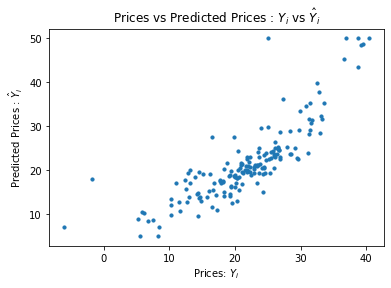

In [52]:
plt.scatter(y_hat_lasso, y_true_lasso, s = 10)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted Prices : $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices : $Y_i$ vs $\hat{Y}_i$')

ref  
[ridge_lasso](https://brunch.co.kr/@itschloe1/11)

$\lambda$ 변화시켜보기

In [53]:
from sklearn.model_selection import KFold

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')

# 0.01 ~ 20까지 50개로 나눠서 
alpha = np.linspace(0.01, 20, 50)

t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha : 
    ridge = Ridge(fit_intercept=True, alpha = a)

    #Computing the RMSE on training data
    ridge.fit(X_train, y_train)
    p = ridge.predict(X_test)
    err = p - y_test
    # err^2
    total_error = np.dot(err, err)
    rmse_train = np.sqrt(total_error / len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(10)
    xval_err = 0
    
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err,err)

    rmse_10cv = np.sqrt(xval_err / len(X))

    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a, rmse_train, rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.5529		 5.8757
0.418	 4.5749		 5.8419
0.826	 4.5935		 5.8270
1.234	 4.6074		 5.8186
1.642	 4.6180		 5.8126
2.050	 4.6262		 5.8078
2.458	 4.6327		 5.8034
2.866	 4.6379		 5.7993
3.274	 4.6422		 5.7953
3.682	 4.6458		 5.7912
4.090	 4.6489		 5.7873
4.498	 4.6515		 5.7833
4.906	 4.6538		 5.7793
5.313	 4.6558		 5.7753
5.721	 4.6576		 5.7714
6.129	 4.6593		 5.7674
6.537	 4.6607		 5.7635
6.945	 4.6621		 5.7596
7.353	 4.6633		 5.7557
7.761	 4.6644		 5.7518
8.169	 4.6655		 5.7479
8.577	 4.6665		 5.7441
8.985	 4.6674		 5.7404
9.393	 4.6683		 5.7366
9.801	 4.6691		 5.7329
10.209	 4.6699		 5.7292
10.617	 4.6707		 5.7256
11.025	 4.6714		 5.7220
11.433	 4.6722		 5.7184
11.841	 4.6729		 5.7149
12.249	 4.6735		 5.7114
12.657	 4.6742		 5.7079
13.065	 4.6748		 5.7045
13.473	 4.6755		 5.7011
13.881	 4.6761		 5.6978
14.289	 4.6767		 5.6945
14.697	 4.6773		 5.6912
15.104	 4.6779		 5.6880
15.512	 4.6785		 5.6848
15.920	 4.6791		 5.6816
16.328	 4.6797		 5

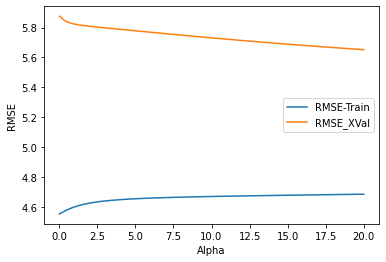

In [54]:
plt.plot(alpha, t_rmse, label = 'RMSE-Train')
plt.plot(alpha, cv_rmse, label = 'RMSE_XVal')
plt.legend( ('RMSE-Train', 'RMSE_XVal') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

> $\lambda$ 가 크면 그만큼 제약이 생겨서 overfitting이 방지 되므로 기존 트레인셋은 커질수록 RMSE가 커지고 Test는 낮아지는 것을 확인 가능함

> SGD 사용시 Scaling 필수!!